In [28]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 618.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 1.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.2/116.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.3 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
/opt/conda/lib/python3.9/site-packages/pip/_vendor/packaging/version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp39-cp39-linux_x86_64.whl size=276686 sha256=ec2b4b4ff6e2288e9e77568708eba716d7c704e743a8428858b479accd4de758
  Stored in directory: /root/.cache/pip/wheels/77/ca/43/00120282a2aa9323d

In [1]:
class PortfolioOptimizer:
    def __init__(self):
        self.portfolio_value = 0
        self.state_transition_counts = {'+1': {'+1': 0, '0': 0, '-1': 0},
                                        '0': {'+1': 0, '0': 0, '-1': 0},
                                        '-1': {'+1': 0, '0': 0, '-1': 0}}
        self.current_state = None

    def classify_state(self, returns):
        if returns >= 0.01:
            return '+1'
        elif returns > -0.01:
            return '0'
        else:
            return '-1'

    def update_portfolio_value(self, decision):
        if decision == '+1':
            self.portfolio_value += 1
        elif decision == '-1':
            self.portfolio_value -= 1

    def update_state_transition_counts(self, previous_state, current_state):
        self.state_transition_counts[previous_state][current_state] += 1

    def calculate_transition_distribution(self):
        transition_distribution = {}
        for previous_state, transitions in self.state_transition_counts.items():
            total_transitions = sum(transitions.values())
            if total_transitions == 0:
                continue
            transition_distribution[previous_state] = {new_state: count / total_transitions for new_state, count in transitions.items()}
        return transition_distribution

    def make_decision(self, current_returns):
        current_state = self.classify_state(current_returns)
        if self.current_state is not None:
            self.update_state_transition_counts(self.current_state, current_state)
        self.current_state = current_state

        if self.current_state == '+1' and self.portfolio_value == 0:
            self.update_portfolio_value(self.current_state)
            return '+1'
        elif self.current_state == '-1' and self.portfolio_value == 0:
            self.update_portfolio_value(self.current_state)
            return '-1'
        else:
            return '0'

In [4]:
import yfinance as yf

startDate = '2021-12-31'
endDate = '2023-12-31'
ticker = 'AAPL'
resultData = yf.download(ticker, startDate, endDate)
resultData["Date"] = resultData.index
resultData = resultData[["Date", "Adj Close"]]

resultData["Returns"] = resultData["Adj Close"].pct_change()


portfolio_optimizer = PortfolioOptimizer()

for i in range(1, len(resultData)):
    current_returns = resultData["Returns"][i]
    decision = portfolio_optimizer.make_decision(current_returns)
    print(f"Day {i}: Decision - {decision}, Portfolio Value - {portfolio_optimizer.portfolio_value}")

transition_distribution = portfolio_optimizer.calculate_transition_distribution()
print("Transition Distribution:")
print(transition_distribution)


[*********************100%%**********************]  1 of 1 completed

Transition Distribution:
{'+1': {'+1': 0.21875, '0': 0.5625, '-1': 0.21875}, '0': {'+1': 0.292, '0': 0.492, '-1': 0.216}, '-1': {'+1': 0.21311475409836064, '0': 0.45901639344262296, '-1': 0.32786885245901637}}



/tmp/ipykernel_76/3368487108.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultData["Returns"] = resultData["Adj Close"].pct_change()


In [37]:
import pandas as pd
import yfinance as yf

aapl_df = yf.download('AAPL', 
                      start='2021-01-01', 
                      end='2023-06-12', 
                      progress=False,
)
print(aapl_df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  239.820007  248.163330  239.063339  243.256668  243.256668   
2021-01-05  241.220001  246.946671  239.733337  245.036667  245.036667   
2021-01-06  252.830002  258.000000  249.699997  251.993332  251.993332   
2021-01-07  259.209991  272.329987  258.399994  272.013336  272.013336   
2021-01-08  285.333344  294.829987  279.463318  293.339996  293.339996   

               Volume  
Date                   
2021-01-04  145914600  
2021-01-05   96735600  
2021-01-06  134100000  
2021-01-07  154496700  
2021-01-08  225166500  


In [ ]:
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="5y")
aapl_df['Close'].plot(title="AAPL's stock price")

[*********************100%%**********************]  1 of 1 completed


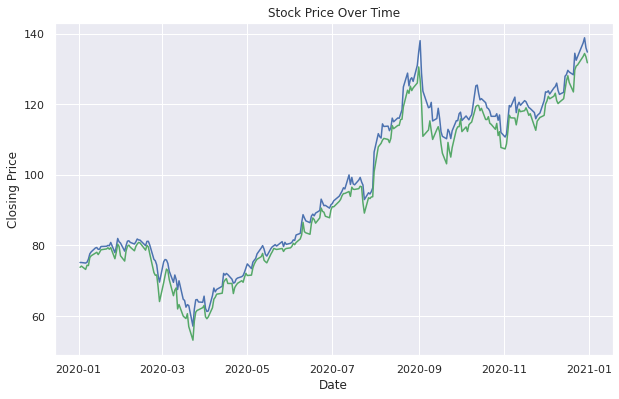

In [9]:


ticker_symbol = 'AAPL' 
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Plot closing price over time
plt.figure(figsize=(10, 6))
#plt.plot(stock_data['Close'])
plt.plot(stock_data['High'])
plt.plot(stock_data['Low'])


#plt.plot(stock_data['Adj Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


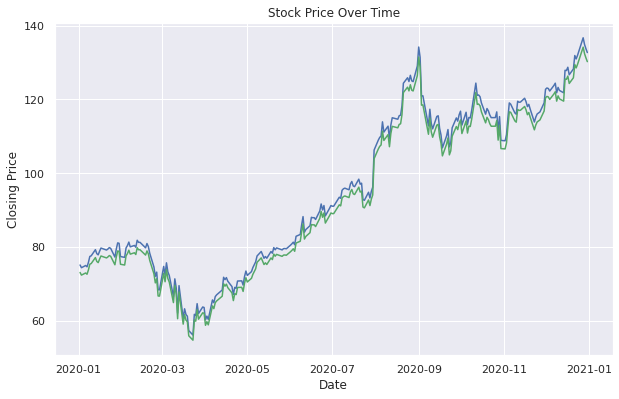

In [10]:
import matplotlib.pyplot as plt

ticker_symbol = 'AAPL'  
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Plot closing price over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'])
#plt.plot(stock_data['High'])
#plt.plot(stock_data['Low'])


plt.plot(stock_data['Adj Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


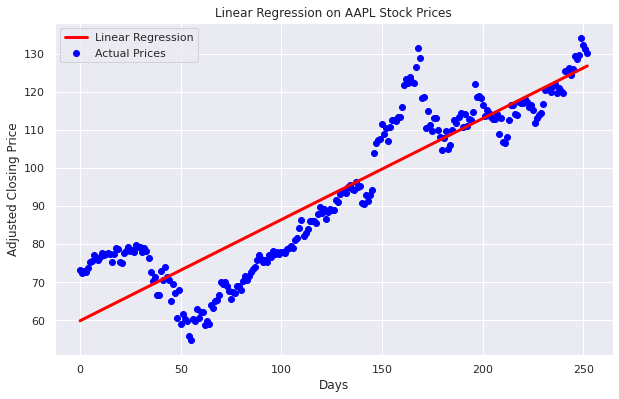

Mean Absolute Error (MAE): 23.670839087749243
Mean Squared Error (MSE): 838.822284821483
Root Mean Squared Error (RMSE): 28.962428848794485


In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Retrieving stock data
ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extracting adjusted closing prices
closing_prices = stock_data['Adj Close'].values.reshape(-1, 1)
dates = np.arange(len(closing_prices)).reshape(-1, 1)

model = LinearRegression()
model.fit(dates, closing_prices)

predictions = model.predict(dates)

plt.figure(figsize=(10, 6))
plt.scatter(dates, closing_prices, color='blue', label='Actual Prices')
plt.plot(dates, predictions, color='red', linewidth=3, label='Linear Regression')
plt.xlabel('Days')
plt.ylabel('Adjusted Closing Price')
plt.title('Linear Regression on AAPL Stock Prices')
plt.legend()
plt.grid(True)
plt.show()
residuals = closing_prices.ravel() - predictions

print("Mean Absolute Error (MAE):", np.mean(np.abs(residuals)))
print("Mean Squared Error (MSE):", np.mean(residuals**2))
print("Root Mean Squared Error (RMSE):", np.sqrt(np.mean(residuals**2)))


[*********************100%%**********************]  1 of 1 completed


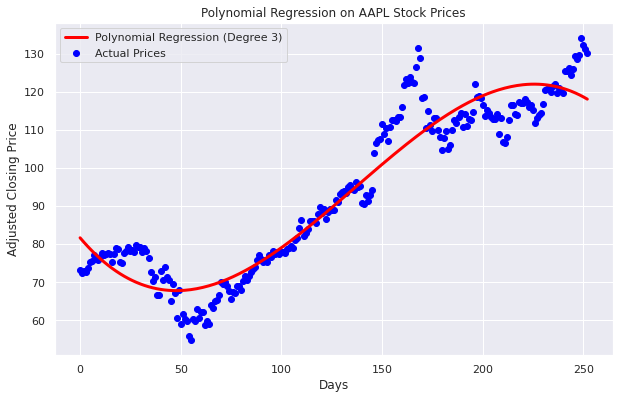

Mean Absolute Error (MAE): 23.98248326263178
Mean Squared Error (MSE): 882.4794250230656
Root Mean Squared Error (RMSE): 29.706555253395933


In [15]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

closing_prices = stock_data['Adj Close'].values.reshape(-1, 1)
dates = np.arange(len(closing_prices)).reshape(-1, 1)

# Polynomial regression
degree = 3  # Define the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
dates_poly = poly_features.fit_transform(dates)

# Fitting polynomial regression model
model = LinearRegression()
model.fit(dates_poly, closing_prices)

# Predictions
predictions = model.predict(dates_poly)

# Plotting data and polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(dates, closing_prices, color='blue', label='Actual Prices')
plt.plot(dates, predictions, color='red', linewidth=3, label='Polynomial Regression (Degree {})'.format(degree))
plt.xlabel('Days')
plt.ylabel('Adjusted Closing Price')
plt.title('Polynomial Regression on AAPL Stock Prices')
plt.legend()
plt.grid(True)
plt.show()
residuals = closing_prices.ravel() - predictions

# Print errors
print("Mean Absolute Error (MAE):", np.mean(np.abs(residuals)))
print("Mean Squared Error (MSE):", np.mean(residuals**2))
print("Root Mean Squared Error (RMSE):", np.sqrt(np.mean(residuals**2)))

[*********************100%%**********************]  1 of 1 completed


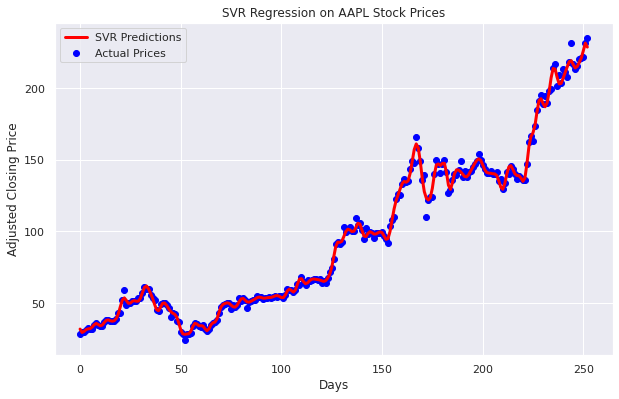

Mean Absolute Error (MAE): 1.3712998487296277
Mean Squared Error (MSE): 6.87184696419278
Root Mean Squared Error (RMSE): 2.6214207911346055


In [20]:
import yfinance as yf
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Retrieving stock data
ticker_symbol = 'TSLA'
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extracting adjusted closing prices
closing_prices = stock_data['Adj Close'].values.reshape(-1, 1)
dates = np.arange(len(closing_prices)).reshape(-1, 1)

# Initialize and train SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # RBF kernel
svr_model.fit(dates, closing_prices.ravel())  # Ravel to convert to 1D array

# Make predictions
predictions = svr_model.predict(dates)

# Plotting data and SVR predictions
plt.figure(figsize=(10, 6))
plt.scatter(dates, closing_prices, color='blue', label='Actual Prices')
plt.plot(dates, predictions, color='red', linewidth=3, label='SVR Predictions')
plt.xlabel('Days')
plt.ylabel('Adjusted Closing Price')
plt.title('SVR Regression on AAPL Stock Prices')
plt.legend()
plt.grid(True)
plt.show()
residuals = closing_prices.ravel() - predictions

# Print errors
print("Mean Absolute Error (MAE):", np.mean(np.abs(residuals)))
print("Mean Squared Error (MSE):", np.mean(residuals**2))
print("Root Mean Squared Error (RMSE):", np.sqrt(np.mean(residuals**2)))

In [21]:
import yfinance as yf
import numpy as np

# Retrieving stock data
ticker_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Define states based on daily returns
state_up = 0.01  # Up state threshold
state_down = -0.01  # Down state threshold

# Function to determine state
def get_state(return_val):
    if return_val > state_up:
        return 'Up'
    elif return_val < state_down:
        return 'Down'
    else:
        return 'Unchanged'

# Apply state function to daily returns
stock_data['State'] = stock_data['Daily_Return'].apply(get_state)

# Count transitions
transition_counts = stock_data['State'].value_counts()

# Calculate transition probabilities
transition_probabilities = transition_counts / transition_counts.sum()

print("Transition Probabilities:")
print(transition_probabilities)


[*********************100%%**********************]  1 of 1 completed

Transition Probabilities:
Unchanged    0.375494
Up           0.371542
Down         0.252964
Name: State, dtype: float64


[*********************100%%**********************]  1 of 1 completed


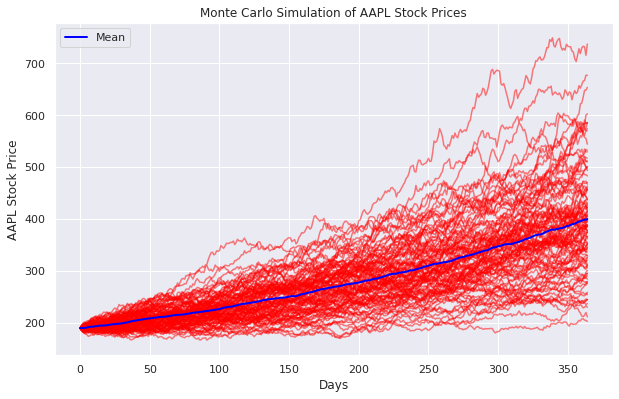

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


ticker_symbol='AAPL'
start_date='2023-01-01'
end_date='2023-12-01'
stock_data=yf.download(ticker_symbol, start=start_date, end=end_date)
# the above downloads the data 
daily_returns =stock_data['Adj Close'].pct_change()

mu=daily_returns.mean()
sigma=daily_returns.std()

initial_price = stock_data['Adj Close'].iloc[-1]
num_days=365
num_simulations=100

simulated_prices= np.zeros((num_simulations, num_days))
for i in range(num_simulations):
    prices =[initial_price]
    for day in range(1,num_days):
        price = prices[-1] * (1 + np.random.normal(mu, sigma))
        prices.append(price)
    simulated_prices[i] = prices


plt.figure(figsize=(10, 6))
plt.plot(simulated_prices.T,color='red',alpha=0.5)
plt.plot(simulated_prices.mean(axis=0),color='blue',linewidth=2,label='Mean')
plt.title('Monte Carlo Simulation of AAPL Stock Prices')
plt.xlabel('Days')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()
